<a href="https://colab.research.google.com/github/BankNatchapol/CPE463-Image-Processing/blob/main/CPE463_color_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage import io

%matplotlib inline

RGB : (403, 665, 3)


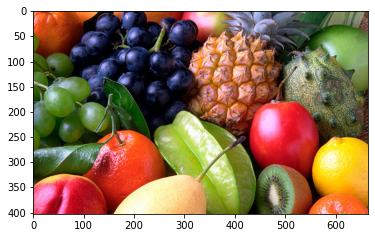

In [2]:
image = io.imread('http://www.theplayatimes.com/wp-content/uploads/2017/12/fruits-82524-rgb.jpg')

print("RGB :", image.shape)
plt.imshow(image)
plt.show()

# **RGB** 
Stands for "Red Green Blue." RGB refers to three hues of light that can be mixed together to create different colors. Combining red, green, and blue light is the standard method of producing color images on screens, such as TVs, computer monitors, and smartphone screens.

In [3]:
RGB_Color = ["Red", "Green", "Blue"]

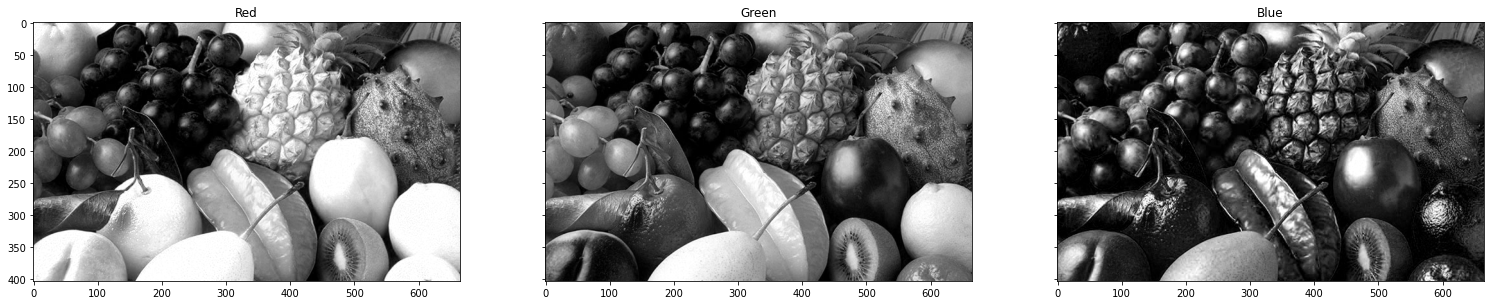

In [4]:
down_scale = 15

# plot red green blue image seperately
fig, axs = plt.subplots(1, 3, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

for c in range(3):
  axs[c].imshow(image[:,:,c], cmap="gray")
  axs[c].title.set_text(RGB_Color[c])

plt.show()

# **CMY**
Stand for "Cyan Magenta Yellow." CMY is color space used for printing. In theory, equal amounts of all three colors produce black. In practice, a separate black ink is required for quality printing. See CMYK.

In [5]:
CMY_Color = ["Cyan", "Margenta", "Yellow"]

Convert RGB to CMY with
$$
\begin{bmatrix}
C\\ 
M\\
Y 
\end{bmatrix} = \begin{bmatrix}
1\\ 
1\\ 
1
\end{bmatrix} - \begin{bmatrix}
R\\ 
G\\ 
B
\end{bmatrix}
$$
Convert CMY to RGB with
$$
\begin{bmatrix}
R\\ 
G\\ 
B
\end{bmatrix}
 = \begin{bmatrix}
1\\ 
1\\ 
1
\end{bmatrix} - \begin{bmatrix}
C\\ 
M\\
Y 
\end{bmatrix}
$$

In [6]:
def RGB2CMY(image):
  """
  Convert RGB image into CMY image.
  Parameter:
    image: (height, width, color_channel) size image.
  
  Return:
    CMY model image.
  """

  return 255 - image
  
def CMY2RGB(image):
  """
  Convert CMY image into RGB image.
  Parameter:
    image: (height, width, color_channel) size image.
  
  Return:
    RGB model image.
  """

  return 255 - image

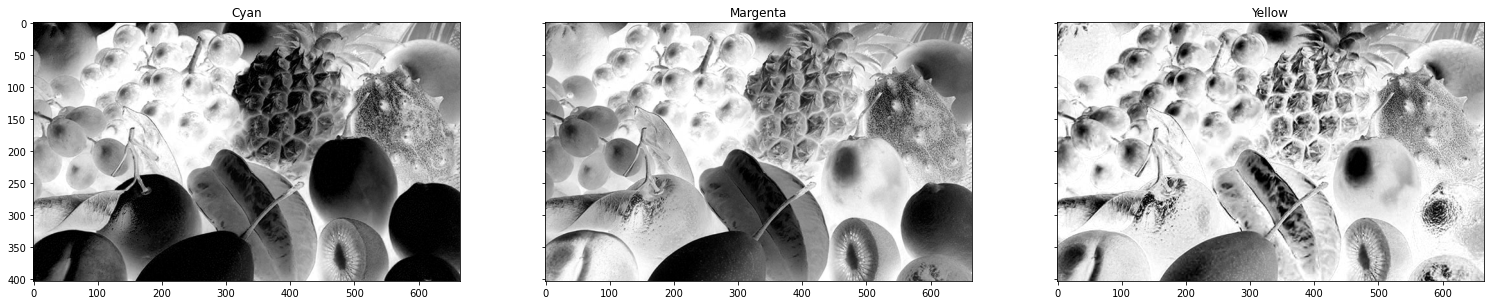

In [7]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

CMY_Image = RGB2CMY(image)

for c in range(3):
  axs[c].imshow(CMY_Image[:, :, c], cmap="gray")
  axs[c].title.set_text(CMY_Color[c])

plt.show()

CMY : (403, 665, 3)


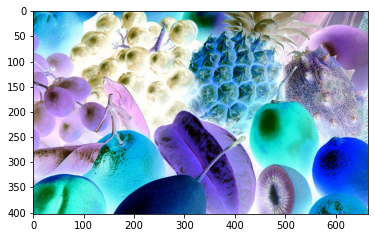

In [8]:
print("CMY :", CMY_Image.shape)
plt.imshow(CMY_Image)
plt.show()

Convert back from CMY to RGB.

RGB : (403, 665, 3)


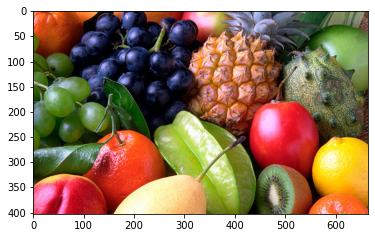

In [9]:
RGB_from_CMY = CMY2RGB(CMY_Image)
print("RGB :", RGB_from_CMY.shape)
plt.imshow(RGB_from_CMY)
plt.show()

# **HSI**
Stand for "Hue Saturation Intensity." HSI color space is very important and attractive color model for image processing applications because it represents colors similarly how the human eye senses colors.

In [10]:
HSI_Prop = ["Hue", "Saturation", "Intensity"]

Convert RGB to HSI with
$$ 
 \theta = cos^{-1}\left ( \frac{\frac{1}{2}\left [ (R-G) + (R-B) \right ]}{\left [ (R-G)^{2} + (R-B)(G-B) \right ]^{\frac{1}{2}}} \right )
$$ 
<br><br>
$$ 
 H = \begin{cases}
    \theta, & 
          \text{for } B \leq G  \\
    360^{\circ} - \theta , &\text{for } B > G \end{cases}
$$ 
<br><br>
$$ 
S = 1-\frac{3}{R+G+B}min(R,G,B)
$$ 
<br><br>
$$ 
I = \frac{1}{3}(R,G,B)
$$ 
<br><br>
Convert HSI to RGB with
$$ R = \begin{cases}
    I(1+\frac{Scos(H))}{cos(60^{\circ} - H)}), & 
          \text{for } 0^{\circ} \leq H <  120^{\circ}  \\
    I(1-S), &\text{for } 120^{\circ} \leq H <  240^{\circ} \\
    3I  - (G+B), &\text{for } 240^{\circ} \leq H \leq  360^{\circ}  
    \end{cases}
$$
<br><br>
$$
 G = \begin{cases}
    3I-(R+B), & 
          \text{for } 0^{\circ} \leq H <  120^{\circ}  \\
    I(1+\frac{Scos(H-120^{\circ})}{cos(60^{\circ} - (H-120^{\circ}))}), &\text{for } 120^{\circ} \leq H <  240^{\circ} \\
    I(1-S), &\text{for } 240^{\circ} \leq H \leq  360^{\circ}  \end{cases}
$$
<br><br>
$$
 B = \begin{cases}
    I(1-S), & 
          \text{for } 0^{\circ} \leq H <  120^{\circ}  \\
    3I - (R+G), &\text{for } 120^{\circ} \leq H <  240^{\circ} \\
    I(1+\frac{Scos(H-240^{\circ})}{cos(60^{\circ} - (H-240^{\circ}))}), &\text{for } 240^{\circ} \leq H \leq  360^{\circ}  \end{cases}
$$

In [11]:
#$def RGB2HSI(image):
  """
  Convert RGB image into HSI image.
  Parameter:
    image: (height, width, color_channel) size image.
  
  Return:
    HSI model image.
  """

  HSI_Image = np.zeros_like(image).astype(float) # create temp hsi image

  for i in range(image.shape[0]): # loop through all pixel
    for j in range(image.shape[1]): 
      r, g, b = image[i, j].astype(float)/255.0 # normalization 
      
      if r == g and r == b:
        hue = 0

      else:
        seta = np.arccos(0.5*((r-g) + (r-b))/((((r-g)**2) + ((r-b)*(g-b)))**0.5)) 

        if b <= g:
          hue = seta
        else: 
          hue = 2*np.pi - seta

      if r+g+b == 0:
        saturation = 0
      else:
        saturation = 1 - 3*(min([r, g, b]))/(r+g+b)

      intensity = (1/3)*(r+g+b)
      HSI_Image[i, j] = [hue*255/(np.pi*2), saturation*255, intensity*255]
  
  return HSI_Image

def HSI2RGB(image):
  """
  Convert HSI image into RGB image.
  Parameter:
    image: (height, width, color_channel) size image.
  
  Return:
    RGB model image.
  """

  RGB_Image = np.zeros_like(image).astype(float) # create temp rgb image

  for i in range(image.shape[0]): # loop through all pixel
    for j in range(image.shape[1]):
        hue, saturation, intensity  = image[i, j].astype(float)/255.0 # normalization

        hue = hue*360.0

        if hue >= 0 and hue < 120:
          b = intensity*(1-saturation)
          r = intensity*(1 + (saturation * np.cos(hue*np.pi/180)/(np.cos((60-hue)*np.pi/180))))
          g = 3*intensity - (r + b)
        
        elif hue >= 120 and hue < 240:
          h = hue - 120
          r = intensity*(1 - saturation)
          g = intensity*(1 + (saturation * np.cos(h*np.pi/180)/(np.cos((60-h)*np.pi/180))))
          b = 3*intensity - (r + g)
        
        elif hue >= 240 and hue < 360:
          h = hue - 240
          g = intensity*(1 - saturation)
          b = intensity*(1 + (saturation * np.cos(h*np.pi/180)/(np.cos((60-h)*np.pi/180))))
          r = 3*intensity - (g + b)
        
        else:
          assert 0, "Hue value out of range."
        
        RGB_Image[i, j] = [r, g, b]
        
  return RGB_Image*255.0

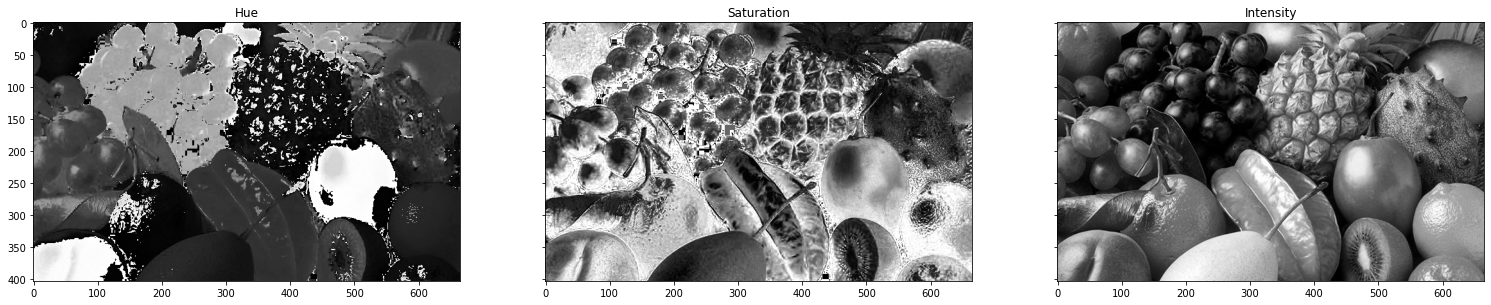

In [12]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize = (image.shape[0]//down_scale, 
                                                      image.shape[1]//down_scale))

HSI_Image = RGB2HSI(image).astype("uint8")

for c in range(3):
  axs[c].imshow(HSI_Image[:, :, c], cmap="gray")
  axs[c].title.set_text(HSI_Prop[c])

plt.show()

HSI : (403, 665, 3)


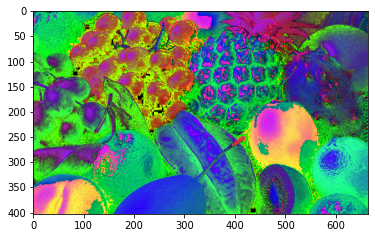

In [13]:
print("HSI :", HSI_Image.shape)
plt.imshow(HSI_Image)
plt.show()

Convert back from HSI to RGB.

RGB : (403, 665, 3)


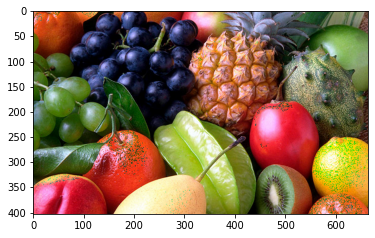

In [14]:
RGB_from_HSI = HSI2RGB(HSI_Image).astype("uint8")
print("RGB :", RGB_from_HSI.shape)
plt.imshow(RGB_from_HSI)
plt.show()